In [113]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [122]:
import pylhe
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

sns.set_theme(style='whitegrid', font_scale=2, palette='deep')

Read LHE file

In [123]:
events = pylhe.read_lhe_with_attributes('MG5_aMC_v2_9_3/out_prova/Events/run_01/unweighted_events.lhe')

In [124]:
data = {'event': [],
        'id': [],
        'px': [],
        'py': [],
        'pz': [],
       }

for n, event in tqdm(enumerate(events), unit='event(s)'):
    for particle in event.particles:
        data['event'].append(n)
        data['id'].append(particle.id)
        data['px'].append(particle.px)
        data['py'].append(particle.py)
        data['pz'].append(particle.pz)

10000event(s) [00:00, 27468.58event(s)/s]


In [125]:
df = pd.DataFrame(data)
df.head(10)

,event,id,px,py,pz
0,0,3.0,0.000000,0.000000,219.284319
1,0,-3.0,-0.000000,-0.000000,-264.355482
2,0,23.0,-6.921418,-42.300932,-242.161326
3,0,23.0,6.921418,42.300932,197.090163
4,1,-2.0,-0.000000,0.000000,60.642305
5,1,2.0,0.000000,-0.000000,-165.236046
6,1,23.0,7.168697,32.384763,-80.047016
7,1,23.0,-7.168697,-32.384763,-24.546725
8,2,-2.0,-0.000000,0.000000,39.738040
9,2,2.0,0.000000,-0.000000,-321.489730


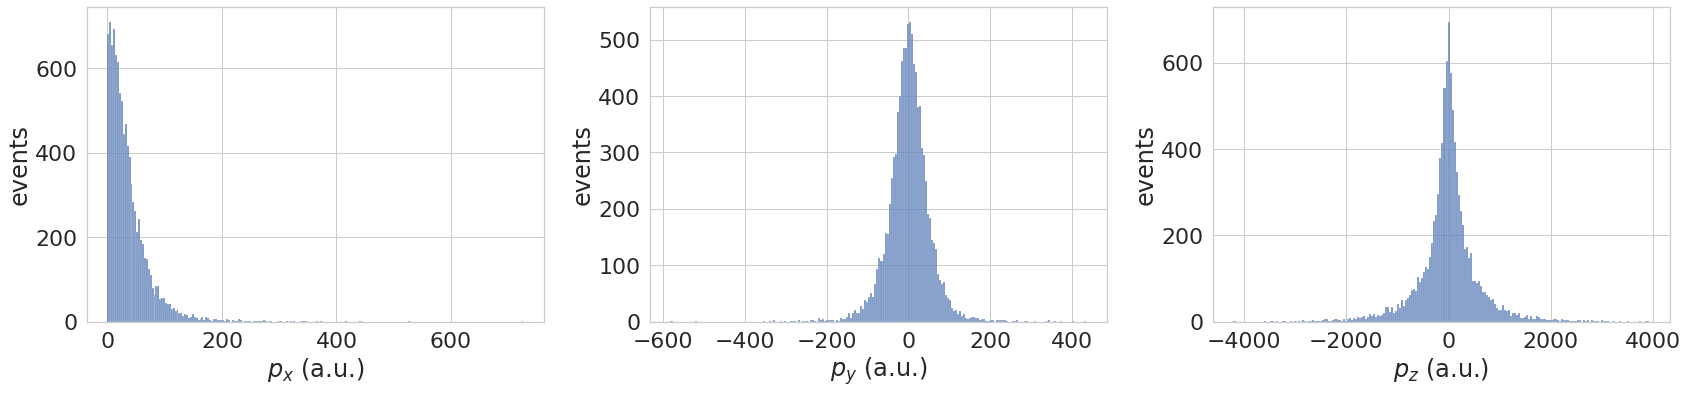

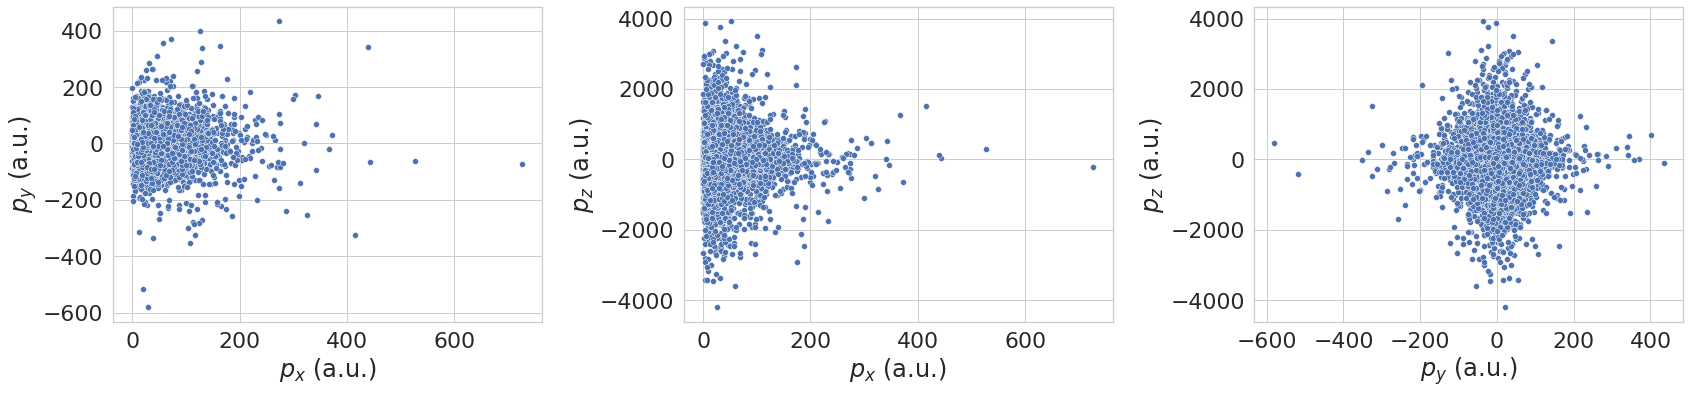

In [137]:
px = df.query('id == 23 & px > 0')['px'].values
py = df.query('id == 23 & px > 0')['py'].values
pz = df.query('id == 23 & px > 0')['pz'].values

fig, ax = plt.subplots(ncols=3, figsize=(24,6))

sns.histplot(px, stat='count', ax=ax[0])
ax[0].set(xlabel=r'$p_x$ (a.u.)', ylabel='events')

sns.histplot(py, stat='count', ax=ax[1])
ax[1].set(xlabel=r'$p_y$ (a.u.)', ylabel='events')

sns.histplot(pz, stat='count', ax=ax[2])
ax[2].set(xlabel=r'$p_z$ (a.u.)', ylabel='events')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(ncols=3, figsize=(24,6))

sns.scatterplot(x=px, y=py, ax=ax[0])
ax[0].set(xlabel=r'$p_x$ (a.u.)', ylabel=r'$p_y$ (a.u.)')

sns.scatterplot(x=px, y=pz, ax=ax[1])
ax[1].set(xlabel=r'$p_x$ (a.u.)', ylabel=r'$p_z$ (a.u.)')

sns.scatterplot(x=py, y=pz, ax=ax[2])
ax[2].set(xlabel=r'$p_y$ (a.u.)', ylabel=r'$p_z$ (a.u.)')

plt.tight_layout()
plt.show()

In [129]:
next(events)

StopIteration: 

In [66]:
type(next(events).particles)

list

In [69]:
dir(next(events).particles[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'color1',
 'color2',
 'e',
 'event',
 'fieldnames',
 'fromstring',
 'id',
 'lifetime',
 'm',
 'mother1',
 'mother2',
 'mothers',
 'px',
 'py',
 'pz',
 'spin',
 'status']

In [70]:
next(events).particles[0].fieldnames

['id',
 'status',
 'mother1',
 'mother2',
 'color1',
 'color2',
 'px',
 'py',
 'pz',
 'e',
 'm',
 'lifetime',
 'spin']